In [1]:
#Importing the Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing the Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the Warning Library
import warnings
warnings.filterwarnings('ignore')
#Importing the Logging Library
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filename='British Airways ML Model.log',
                    force=True)
logging.getLogger('matplotlib').setLevel(logging.WARNING)


In [2]:
logging.info('Importing the Dataset')

In [3]:
df = pd.read_csv("Data/customer_booking.csv", encoding="ISO-8859-1")
df = df.sample(frac=1,random_state=42)

In [4]:
logging.info('Dataset Imported Successfully')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 33553 to 15795
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.7+ M

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [6]:
# Check target distribution before processing
print("Target distribution before processing:")
print(df['booking_complete'].value_counts())

Target distribution before processing:
booking_complete
0    42522
1     7478
Name: count, dtype: int64


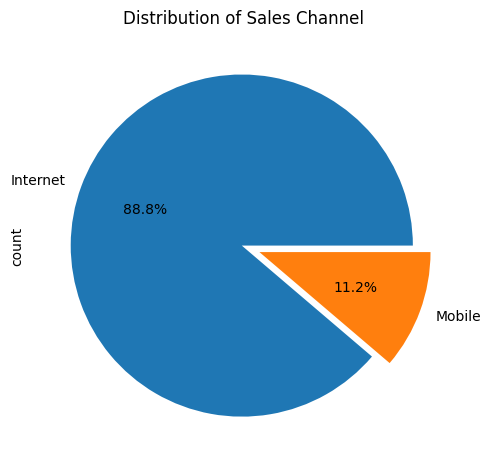

In [7]:
# Cell 4: Univariate Visualization - Pie chart for sales_channel
df['sales_channel'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.01,0.1])
plt.title('Distribution of Sales Channel')
plt.tight_layout()
plt.show()

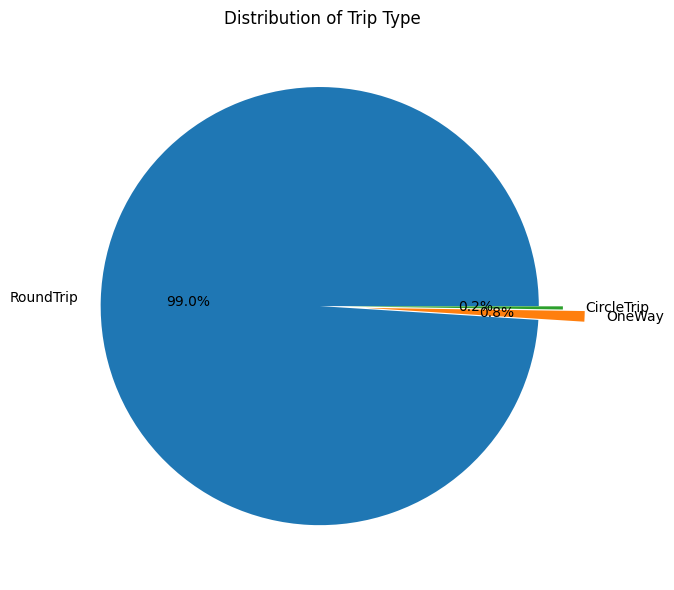

In [8]:
# Cell 5: Univariate Visualization - Pie chart for trip_type
plt.figure(figsize=(8, 6))
df['trip_type'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.01,0.2,0.1])
plt.title('Distribution of Trip Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

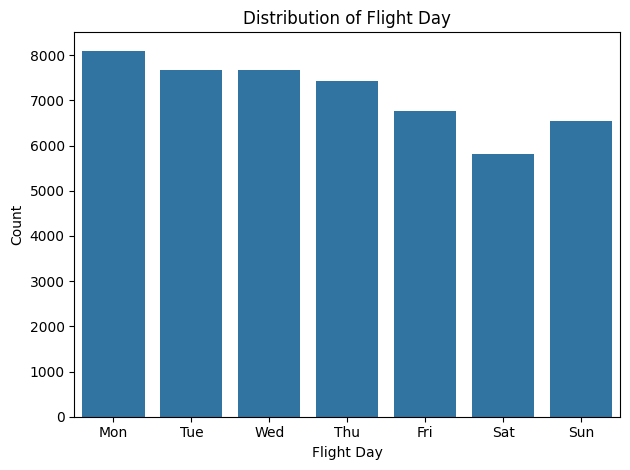

In [9]:
# Cell 6: Univariate Visualization - Bar plot for flight_day
sns.countplot(x='flight_day', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Distribution of Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

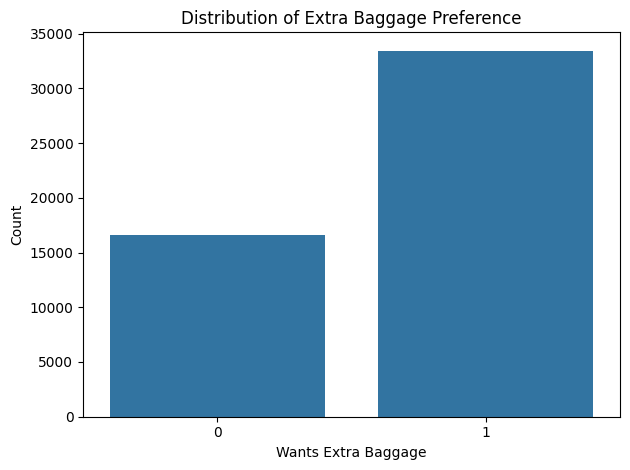

In [10]:
sns.countplot(x='wants_extra_baggage', data=df)
plt.title('Distribution of Extra Baggage Preference')
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

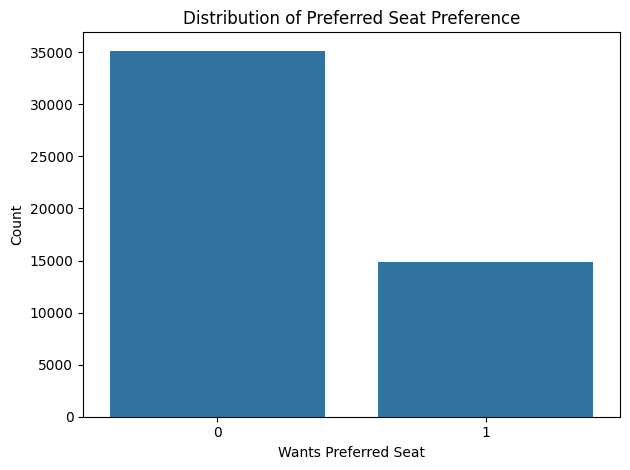

In [11]:
# Cell 8: Univariate Visualization - Bar plot for wants_preferred_seat
glows = sns.countplot(x='wants_preferred_seat', data=df)
plt.title('Distribution of Preferred Seat Preference')
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

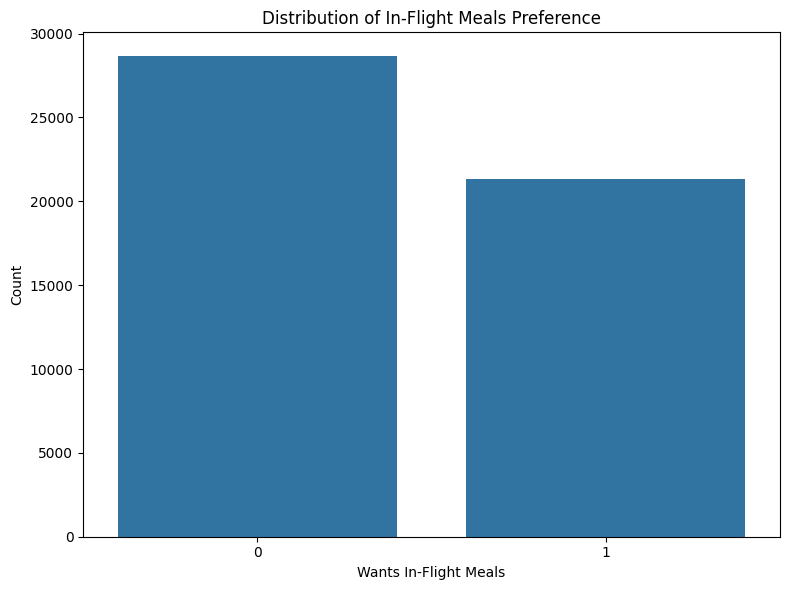

In [12]:
# Cell 9: Univariate Visualization - Bar plot for wants_in_flight_meals
plt.figure(figsize=(8, 6))
sns.countplot(x='wants_in_flight_meals', data=df)
plt.title('Distribution of In-Flight Meals Preference')
plt.xlabel('Wants In-Flight Meals')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

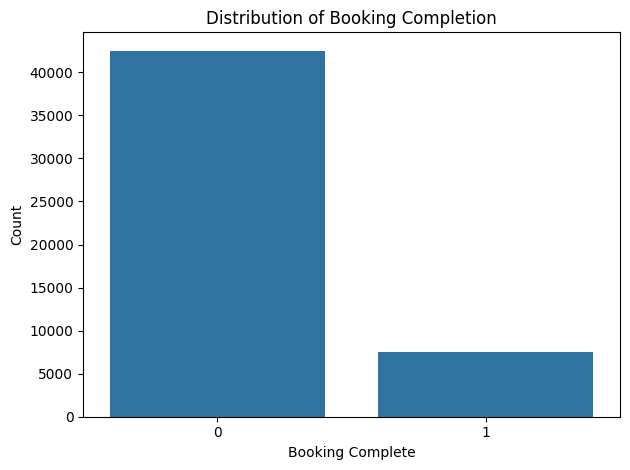

In [13]:
# Cell 10: Univariate Visualization - Bar plot for booking_complete
sns.countplot(x='booking_complete', data=df)
plt.title('Distribution of Booking Completion')
plt.xlabel('Booking Complete')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
#Segregating the Numerical Column from the dataset
numerical_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')

In [15]:
from collections import OrderedDict

stats = []

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    stats.append(OrderedDict({
        'Feature': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Q1': df[col].quantile(0.25),
        'Q3': df[col].quantile(0.75),
        'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
        'Max': df[col].max(),
        'Min': df[col].min(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt(),
        'Variance': df[col].var()
    }))

report = pd.DataFrame(stats)

# Outlier flag
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    outlier_label.append('Has Outliers' if not outliers.empty else 'No Outliers')

report['Outlier Comment'] = outlier_label
report


,Feature,Mean,Median,Q1,Q3,IQR,Max,Min,Skewness,Kurtosis,Variance,Outlier Comment
0,num_passengers,1.591240,1.00,1.00,2.00,1.00,9.0,1.00,2.690908,10.062131,1.040736,Has Outliers
1,purchase_lead,84.940480,51.00,21.00,115.00,94.00,867.0,0.00,1.653035,2.486702,8181.451806,Has Outliers
2,length_of_stay,23.044560,17.00,5.00,28.00,23.00,778.0,0.00,5.274743,48.810238,1148.374182,Has Outliers
3,flight_hour,9.066340,9.00,5.00,13.00,8.00,23.0,0.00,0.396623,-0.302438,29.296885,No Outliers
4,wants_extra_baggage,0.668780,1.00,0.00,1.00,1.00,1.0,0.00,-0.717239,-1.485627,0.221518,No Outliers
5,wants_preferred_seat,0.296960,0.00,0.00,1.00,1.00,1.0,0.00,0.888762,-1.210150,0.208779,No Outliers
6,wants_in_flight_meals,0.427140,0.00,0.00,1.00,1.00,1.0,0.00,0.294593,-1.913291,0.244696,No Outliers
7,flight_duration,7.277561,7.57,5.62,8.83,3.21,9.5,4.67,-0.360080,-1.373927,2.240599,No Outliers
8,booking_complete,0.149560,0.00,0.00,0.00,0.00,1.0,0.00,1.965292,1.862448,0.127194,Has Outliers


In [16]:
logging.info('Checking for the outliers')

In [17]:
#Replacing Outliers with the Median Strategy
for col in df.select_dtypes(include='number').columns:
    if col != 'booking_complete':  # Don't modify target column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR #Lower Whisker Line
        upper_bound = Q3 + 1.5 * IQR #Upper Whisker Line

        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = outliers.sum()

        if outlier_count > 0:
            replacement = df[col].median()
            df.loc[outliers,col] = replacement
            print('----------------------------------------------------------')
            print(f"Replaced {outlier_count} outliers in '{col}' with median")
        else:
            print('----------------------------------------------------------')
            print(f"No Outliers found in '{col}'")

----------------------------------------------------------
Replaced 2903 outliers in 'num_passengers' with median
----------------------------------------------------------
Replaced 3456 outliers in 'purchase_lead' with median
----------------------------------------------------------
Replaced 3807 outliers in 'length_of_stay' with median
----------------------------------------------------------
No Outliers found in 'flight_hour'
----------------------------------------------------------
No Outliers found in 'wants_extra_baggage'
----------------------------------------------------------
No Outliers found in 'wants_preferred_seat'
----------------------------------------------------------
No Outliers found in 'wants_in_flight_meals'
----------------------------------------------------------
No Outliers found in 'flight_duration'


In [18]:
logging.info('Checking for Outliers Process done successfully')

In [19]:
for i in numerical_columns:
    print('--------------------------------------')
    print(f"{i} value counts")
    print(df[i].value_counts())

--------------------------------------
num_passengers value counts
num_passengers
1    34255
2    12804
3     2941
Name: count, dtype: int64
--------------------------------------
purchase_lead value counts
purchase_lead
51     3760
1       685
2       670
6       653
7       638
       ... 
248      38
239      37
253      37
209      35
251      32
Name: count, Length: 257, dtype: int64
--------------------------------------
length_of_stay value counts
length_of_stay
6     7757
5     7286
17    5656
4     5655
3     2839
21    1392
18    1356
20    1285
22    1285
19    1253
29    1040
23     941
2      866
28     851
30     793
27     768
24     765
25     650
31     634
26     600
32     456
33     421
34     394
35     383
36     373
37     284
1      261
41     249
38     249
42     230
40     217
39     213
43     205
44     177
45     167
61     155
59     150
62     148
47     148
57     139
46     137
48     133
60     130
49     127
58     110
50     109
56     109
55     10

In [20]:
for col in categorical_columns:
    print('---------------------------------------')
    print(f'{col} Value Counts: ')
    print(df[col].value_counts())


---------------------------------------
sales_channel Value Counts: 
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64
---------------------------------------
trip_type Value Counts: 
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64
---------------------------------------
flight_day Value Counts: 
flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64
---------------------------------------
route Value Counts: 
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
PERSWA       1
LBUTPE       1
HKTJED       1
CXRMEL       1
KBRWUH       1
Name: count, Length: 799, dtype: int64
---------------------------------------
booking_origin Value Counts: 
booking_origin
Australia           17872
Malaysia             7174
South Korea          4559
Japan                3885
China                3387
                    .

In [21]:
logging.info('Performing Feature Engineering')

In [ ]:
#Feature Engineering
def hour_bin(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'

df['stay_per_passenger'] = df['length_of_stay'] / (df['num_passengers'] + 1)
df['lead_time_ratio'] = df['purchase_lead'] / (df['length_of_stay'] + 1)
df['is_weekend_flight'] = df['flight_day'].isin(['Saturday', 'Sunday']).astype(int)
df['flight_period'] = df['flight_hour'].apply(hour_bin)

In [23]:
categorical_columns = df.select_dtypes(include='object')
print("Categorical columns to encode:", categorical_columns.columns.tolist())

Categorical columns to encode: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin', 'flight_period']


In [24]:
logging.info('Label Encoding the Categorical Columns')

In [25]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding to all categorical columns
for col in categorical_columns.columns:
    if col != 'booking_complete':  # Don't encode target if it's string
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Encoded column: {col}")

# Verify no object columns remain (except target if it's supposed to be object)
print("\nData types after encoding:")
print(df.dtypes)

Encoded column: sales_channel
Encoded column: trip_type
Encoded column: flight_day
Encoded column: route
Encoded column: booking_origin
Encoded column: flight_period

Data types after encoding:
num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
stay_per_passenger       float64
lead_time_ratio          float64
is_weekend_flight          int64
flight_period              int64
dtype: object


In [26]:
logging.info('Checking for the Variance Inflation Rate')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['int64', 'float64'])

    # Drop constant columns
    constant_cols = [col for col in numeric_data.columns if numeric_data[col].nunique() == 1]
    numeric_data = numeric_data.drop(columns=constant_cols)

    vif = pd.DataFrame()
    vif["Feature"] = numeric_data.columns
    vif["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif.sort_values(by="VIF", ascending=False)


calculate_vif(df.drop(columns=['booking_complete']))


,Feature,VIF
4,length_of_stay,76.340181
13,stay_per_passenger,72.340268
2,trip_type,50.277014
12,flight_duration,24.894816
0,num_passengers,14.007919
3,purchase_lead,5.776718
5,flight_hour,5.277315
14,lead_time_ratio,5.050623
7,route,4.009072
15,flight_period,3.965229


In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['booking_complete', 'trip_type','route','booking_origin','is_weekend_flight'],axis=1)
y = df['booking_complete']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
y_train.value_counts()

booking_complete
0    29697
1     5303
Name: count, dtype: int64

In [31]:
logging.info('Balancing the Dataset')

In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [33]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

CBC = CatBoostClassifier(verbose=False).fit(X_train,y_train)
y_pred_CBC = CBC.predict(X_test)
print("The Catboost Classifier Accuracy:", round(accuracy_score(y_test, y_pred_CBC) * 100, 2), "%")

The Catboost Classifier Accuracy: 84.86 %


In [35]:
logging.info('Applying PCA')

In [36]:
from sklearn.decomposition import PCA

# Step 1: Prepare data
X = df.drop(columns=['booking_complete', 'trip_type', 'route', 'booking_origin'])  # Drop unused
y = df['booking_complete']

# Step 2: Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine # of components to retain 90% variance
for i in range(1, X.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 4: Apply PCA
pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 5: Create new DataFrame with principal components
pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 6: Add the target column
pca_df['booking_complete'] = y.values

Explained Variance Ratio: [0.24277025 0.37557567 0.4922865  0.60198778 0.6827013  0.76014784
 0.82851891 0.89152668 0.9368852 ]
Number of components selected: 9


In [37]:
logging.info('Training the Model.......')

In [38]:
X = pca_df.drop(columns=['booking_complete'])
y = pca_df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

CBC = CatBoostClassifier(verbose=False).fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred_CBC = CBC.predict(X_test)
print("The CatBoost Classifier Accuracy:", round(accuracy_score(y_test, y_pred_CBC) * 100, 2), "%")

The CatBoost Classifier Accuracy: 85.45 %


In [39]:
logging.info('Model Training Completed Successfully')

In [40]:
accuracy = accuracy_score(y_test, y_pred_CBC)
logging.info("The Model Accuracy After Training: %.2f%%", accuracy * 100)